In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-09-01 16:54:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-09-01 16:54:51 (32.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [80]:
from numpy.lib.shape_base import column_stack
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv('moore.csv',header=None).values


In [81]:
X=data[:,0].reshape(-1,1)
y=data[:,-1]

In [82]:
y=np.log(y)

In [83]:
X=X-X.mean()

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [85]:
from tensorflow_addons.metrics import RSquare

In [91]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),
              loss = 'mse',
              metrics=[RSquare()])

In [93]:
def schedule(epoch,lr):
  if epoch>50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [94]:
r = model.fit(X,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 0.8971 - r_square: 0.9603 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8903 - r_square: 0.9606 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8814 - r_square: 0.9610 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9001 - r_square: 0.9602 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9140 - r_square: 0.9596 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8877 - r_square: 0.9607 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9916 - r_square: 0.9562 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9938 - r_square: 0.9561 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9405 - r_square: 0.9584 - lr: 0.0010
Epoch 10/2

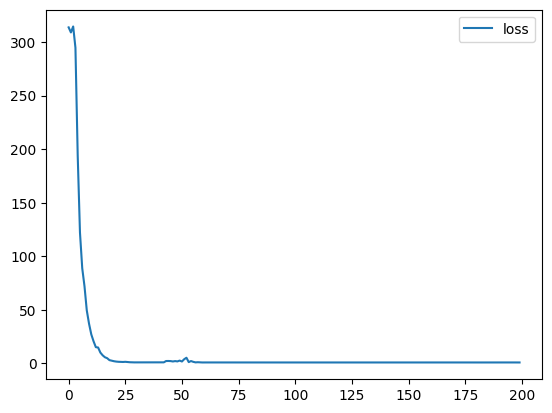

In [90]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()